# Undistort images

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

# Load Camera calibration params
[ret, mtx, dist, rvecs, tvecs] = pickle.load(open( "pickle_data/camera_calibration_params.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 20608 bytes to 0. Functions_Clases Pipeline.py


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

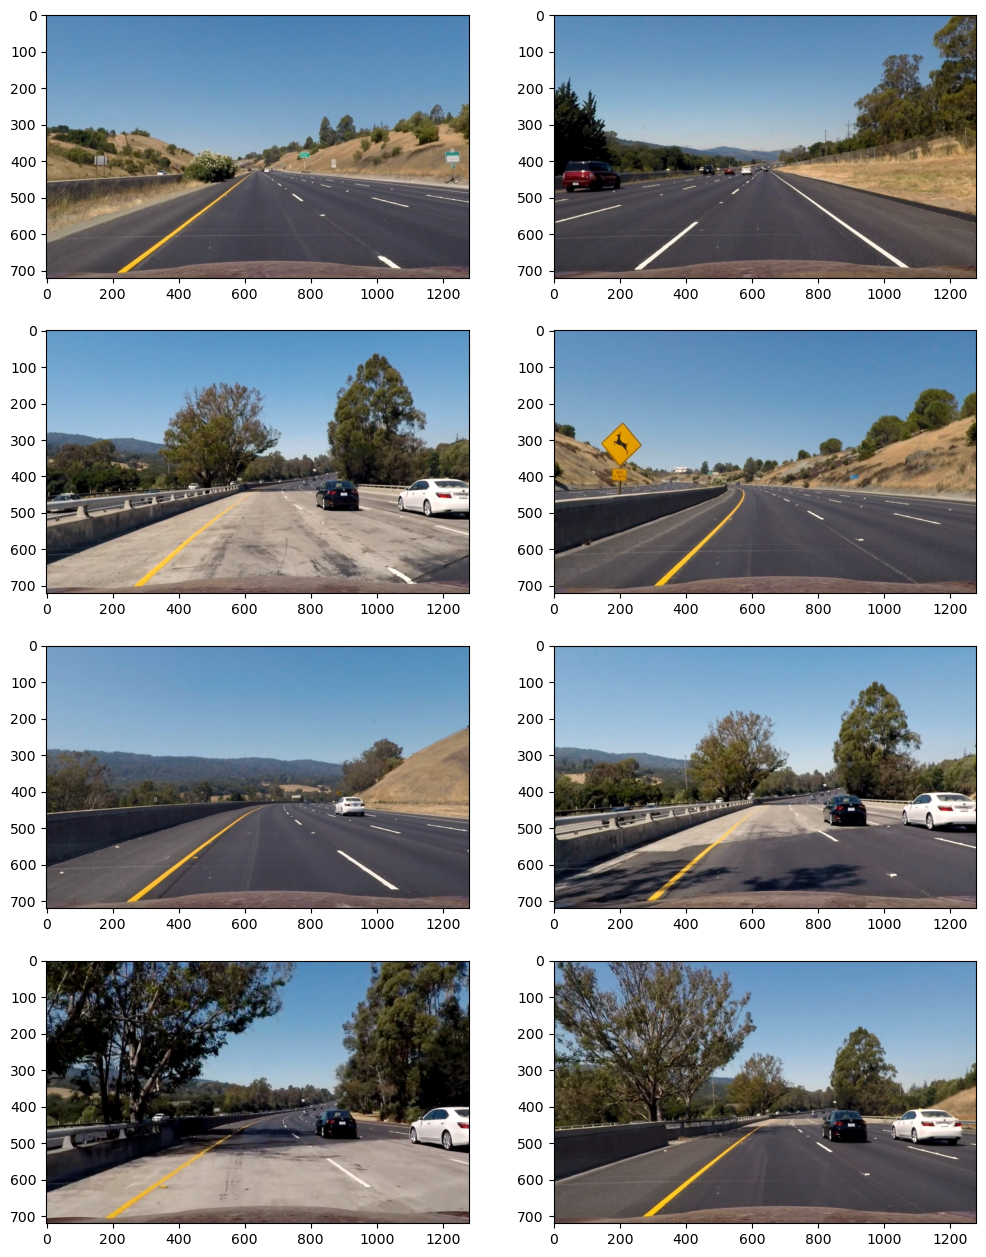

In [2]:
# Read test images
images = glob.glob('test_images/*.jpg')
#images = glob.glob('test_video_frames/*.png')
test_images =  [];
und_images = []

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(rgbimg)
    
    undistorted = undistort_image(test_images[idx], mtx, dist)
    und_images.append(undistorted)
        
displayListImages(und_images,cols=2,cmap=None,figSize=[12,8])

### Compare original image with undistorted one

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

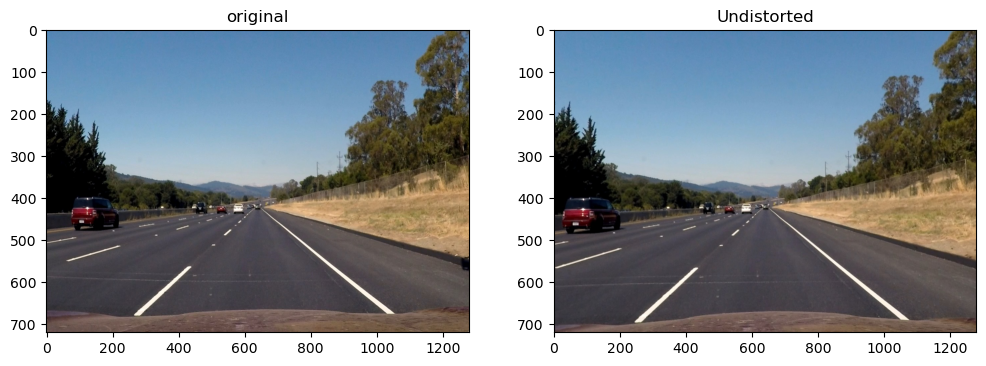

In [3]:
images = glob.glob('test_images/*.jpg')

original = test_images[1]
undistorted_straight = undistort_image(original, mtx, dist)
displayListImages([original,undistorted_straight],cols=2,cmap='gray',figSize=[12,2],titles = ['original','Undistorted'])

## Dump data

In [4]:
pickle.dump( test_images, open( "pickle_data/test_images.p", "wb" ) )
pickle.dump( und_images, open( "pickle_data/undistorted_images.p", "wb" ) )

***

## Images Report

In [5]:
path = './output_images/'


for i in range(len(und_images)):
    write_name = 'und_images'+str(i)+'.jpg'
    im_rgb = cv2.cvtColor(und_images[i], cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(path , write_name), im_rgb)
    
for i in range(len(test_images)):
    write_name = 'test_images'+str(i)+'.jpg'
    im_rgb = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(path , write_name), im_rgb)